C:\Users\wklue\Desktop\SHS


0 88
------------------------------------------------
Pricing Schedule:
[4, 4, 6, 6, 8, 8, 10, 10, 12, 12, 14, 14, 14, 14, 20, 12, 10, 16, 8, 10, 6, 10, 4, 18]
------------------------------------------------
Rules:
True 1	GE_WSM2420D3WW	regular_w	None	before	0	88
------------------------------------------------


________________________________________
Step    |    Value    |        t        |
0.  |         231.59  |   [ 128.]
________________________________________|


C:\Users\wklue\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00554463]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'warnflag': 2, 'nit': 5, 'funcalls': 53}
  " state: %s" % convergence_dict)


________________________________________
Step    |    Value    |        t        |
1.  |         236.82  |   [ 125.82924493]
________________________________________|


________________________________________
Step    |    Value    |        t        |
2.  |         242.05  |   [ 122.66833026]
________________________________________|


________________________________________
Step    |    Value    |        t        |
3.  |         242.05  |   [ 122.]
________________________________________|


________________________________________
Step    |    Value    |        t        |
4.  |         243.79  |   [ 121.]
________________________________________|


----------------------------


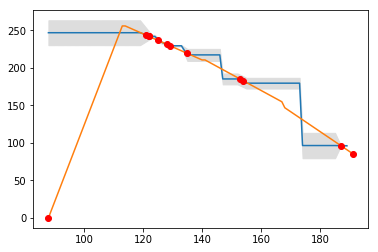

x: 88 mean: [ 246.9747289] stdv: [ 0.06567934]
x: 89 mean: [ 246.97473037] stdv: [ 0.06567876]
x: 90 mean: [ 246.97470303] stdv: [ 0.06568938]
x: 91 mean: [ 246.97476792] stdv: [ 0.06566414]
x: 92 mean: [ 246.97454547] stdv: [ 0.06574985]
x: 93 mean: [ 246.97470208] stdv: [ 0.06568974]
x: 94 mean: [ 246.97474142] stdv: [ 0.06567447]
x: 95 mean: [ 246.97460949] stdv: [ 0.06572542]
x: 96 mean: [ 246.97478395] stdv: [ 0.06565787]
x: 97 mean: [ 246.97472209] stdv: [ 0.06568198]
x: 98 mean: [ 246.97471377] stdv: [ 0.06568521]
x: 99 mean: [ 246.97497342] stdv: [ 0.06558288]
x: 100 mean: [ 246.97475553] stdv: [ 0.06566897]
x: 101 mean: [ 246.97469097] stdv: [ 0.06569404]
x: 102 mean: [ 246.97471421] stdv: [ 0.06568504]
x: 103 mean: [ 246.97473162] stdv: [ 0.06567828]
x: 104 mean: [ 246.97484975] stdv: [ 0.06563203]
x: 105 mean: [ 246.97497342] stdv: [ 0.06558288]
x: 106 mean: [ 246.97497342] stdv: [ 0.06558288]
x: 107 mean: [ 246.97470075] stdv: [ 0.06569026]
x: 108 mean: [ 246.97471976] stdv

In [1]:
%matplotlib inline
import src.Expectation as expectation
from src.bayes_opt.bayesian_optimization import BayesianOptimization as bayesian
import src.LineGraph as graph
import os
print(os.getcwd())
import src.Parameters
src.Parameters.Parameters(fname='C:/Users/wklue/Desktop/SHS/resources/input/rules.txt')
import src.Controller

params = src.Parameters.Parameters
print('------------------------------------------------')
print('Pricing Schedule:')
print(params.price_schema)
print('------------------------------------------------')
print('Rules:')
for r in params().rules:
    print(r.to_string())
print('------------------------------------------------')

expect, p_x, p_mean, p_std = src.Controller.execute()
line_graph = graph.LineGraph(expect.bounds[0])
#line_graph.add_expectation(expect.kline[0])
kappa = 2.53 * 100
line_graph.add_confidence_interval(kappa, p_mean, p_std, p_x)
expect.show_ucb()
line_graph.show_graph()

for i in range(len(p_std)):
    print('x:', p_x[i], 'mean:', p_mean[i], 'stdv:', p_std[i])